In [24]:
#Here publicly avaliable data from LendingClub.com is used for the period 2007-2010.
#Lending Club is a site where investors lend money to borrowers.Therefore here a model is built to predict how trustworthy is the loan recipient.
#The data was downloaded from https://www.lendingclub.com/auth/login?login_url=%2Fstatistics%2Fadditional-statistics%3F 

In [26]:
#Outline of the project.
#Here first Exploratory Data Analysis(EDA) is done on the data to find out variations with borrowing purpose.
#Some further visualization is done with several graphs to try to find a relation between the various column heads.
#The 'purpose' column needed to be modified as it is categorical bt in text.Thus dummy values was put in instead to represent the categories.
#The data is then split and trained using a Random Forest model for prediction.
#Finally the classification report and confusion matrix is prepared. 

In [28]:
#Some essential libraries are imported in the beginning.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
#Now the loan data is read and stored in 'loans'.

In [2]:
loans = pd.read_csv('loan_data.csv')

In [30]:
#Checking out the head of the data and general info using some inbuilt functions.

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [31]:
#Here a histogram is plotted comparing the FICO scores of the beneficiaries of the two credit policies.
#Higher FICO scores are an indication of higher probability of successfully returning back the loan.

Text(0.5, 0, 'FICO')

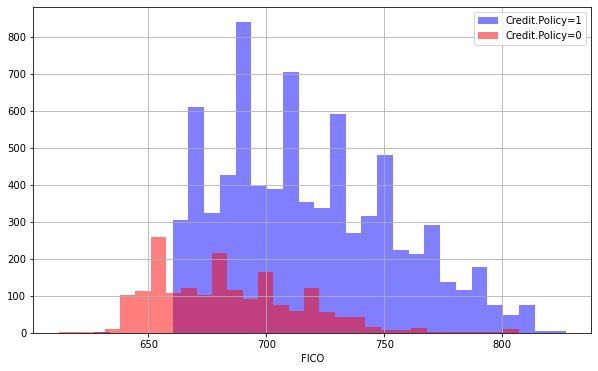

In [32]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

In [33]:
#Similar histogram but for the non-fully paid column.

Text(0.5, 0, 'FICO')

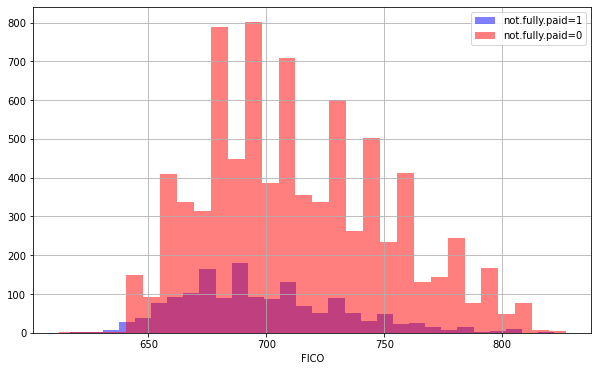

In [34]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

In [35]:
#Another plot(countplot) is created which shows the paid vs non-paid occurences for each purpose of borrowed money.
#This gives us an indication that the purpose of taking a loan has a strong corelation with being able to return back borrowed money.

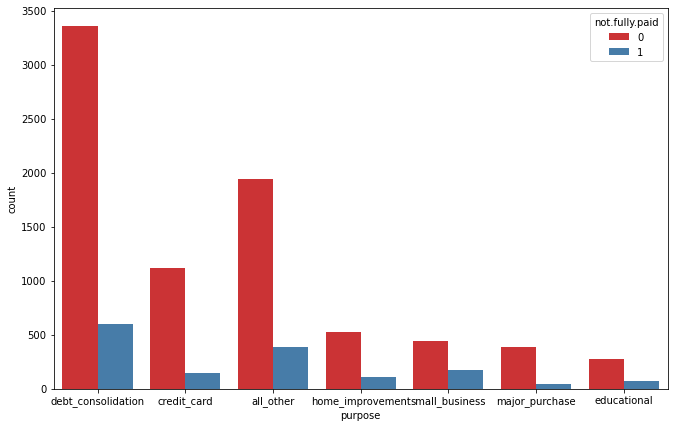

In [36]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

In [37]:
#This jointplot shows the relation between FICO scores and interest rates charged.
#We would expect interest to be lower for people with high FICO scores since the borrower is less likely not to return back the loan.

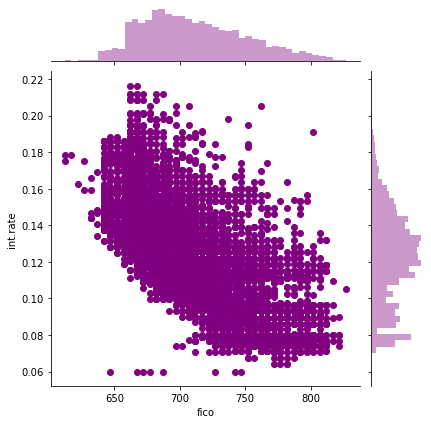

In [38]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

In [39]:
#The following lmplots were created to see if the trend differed between not.fully.paid and credit.policy.

<Figure size 792x504 with 0 Axes>

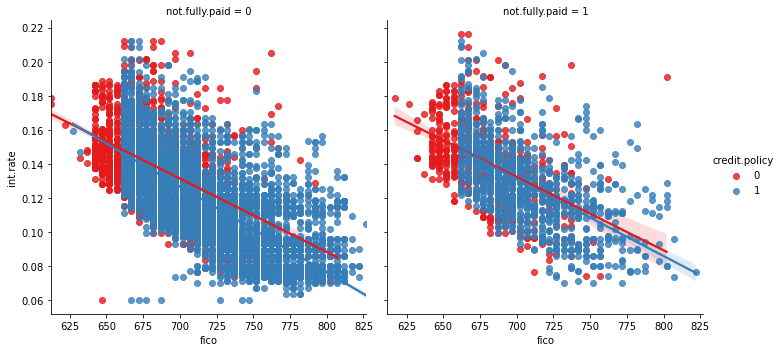

In [10]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

In [40]:
#Since the purpose column is categorical,it is transformed using dummy variables so that sklearn will be able to understand them.
#That's done using pd.get_dummies.

In [41]:
#A list of 1 element containing the string 'purpose' is created and it is called cat_feats.

In [11]:
cat_feats = ['purpose']

In [42]:
#Now pd.get_dummies() is used to create a fixed larger dataframe that has new feature columns with dummy variables.
#This dataframe is initialized as final_data.

In [12]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [13]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [43]:
#Now the sklearn library is imported and the data is split into train and test modules.

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [44]:
#The RandomForest classifier is imported and the model is fit with the training data.

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rfc = RandomForestClassifier(n_estimators=600)

In [47]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [48]:
#Now the trained RandomForest model is used for making predictions.

In [20]:
predictions = rfc.predict(X_test)

In [49]:
#Finally the confusion matrix and classification report is created to see how well our model has performed.

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.60      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.72      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874



In [23]:
print(confusion_matrix(y_test,predictions))

[[2425    6]
 [ 434    9]]


In [50]:
#From the above classification report we can see that we have a acceptable F1 score and recall.Both of them are quite one sided as well.
#Therefore using our RandomForest model we tried to distinguish between loanees who have a higher probability of returning the loan with 85% accuracy.